# Overview

This repository, named "Trend-Based Strategy Optimization using PSO and Genetic Algorithm", is dedicated to optimizing a trend-based trading strategy for the EURUSD currency pair. The strategy uses 90% of 1-hour candlestick data and operates on the principles of maximizing returns and minimizing risk.

The strategy opens buy or sell signals based on the relationship between the closing price, the Supertrend value, and the Exponential Moving Average (EMA). The commission is considered as 3 pips per trade, and no margin is used.

The repository guides you through the process of data preparation, strategy development, optimization using Particle Swarm Optimization (PSO) and Genetic Algorithm (GA), and backtesting.

It also suggests future enhancements such as integrating Relative Strength Index (RSI) or Commodity Channel Index (CCI), exploring different types of Average True Range (ATR) calculations, experimenting with various moving average types, and optimizing margin settings for risk management.

Please note that this repository is intended for educational and backtesting purposes, and it should not be considered as financial advice. Always consult with a licensed financial professional before making any financial decisions. Happy trading! 😊

In [ ]:
!pip install backtesting
!pip install pandas_ta
!pip install pyswarm
!pip install geneticalgorithm2

In [ ]:
import pandas_ta as ta
import backtesting
import pandas as pd
import numpy as np

from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from geneticalgorithm2 import geneticalgorithm2 as ga
from pyswarm import pso

from numpy import nan as npNaN
from pandas import DataFrame
from pandas_ta.overlap import hl2
from pandas_ta.utils import get_offset, verify_series

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code snippet is part of a larger project for optimizing a trend-based trading strategy. Here's a breakdown of what it does:

1. **Data Loading**: The `pd.read_csv` function is used to load a CSV file from a specified path. In this case, the file 'EURUSD_H1.csv' is loaded from the user's Google Drive.

2. **Column Renaming**: The column names of the DataFrame `df_total` are renamed to 'Time', 'Open', 'High', 'Low', 'Close', and 'Volume'.

3. **Time Conversion**: The 'Time' column is converted to a datetime object using the `pd.to_datetime` function. This is necessary for time series analysis.

4. **Indexing**: The 'Time' column is set as the index of the DataFrame using the `set_index` function. This is a common practice in time series analysis where time information is the index of the DataFrame.

5. **Data Slicing**: The DataFrame is sliced to only include the last 10,000 rows using `df_total.iloc[-10000:]`.

6. **Train-Test Split**: The data is split into a training set (`df_train`) and a test set (`df_test`). The first 9,000 rows are used for training and the remaining 1,000 rows are used for testing.

This code is a typical example of the initial steps in a data analysis or machine learning project, which involve loading the data, preprocessing it, and splitting it into training and testing sets. The training set is used to build and optimize the model, while the test set is used to evaluate the model's performance on unseen data. In this case, the data represents EURUSD 1-hour candlestick data, which will be used to optimize a trend-based trading strategy.

In [ ]:
# rest of your code
df_total = pd.read_csv('/content/drive/MyDrive/EURUSD_H1.csv')

# define the new column names
new_column_names = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']

# rename the columns
df_total.columns = new_column_names
# convert the Time column to datetime
df_total['Time'] = pd.to_datetime(df_total['Time'])
# set the Time column as the index
df_total.set_index('Time', inplace=True)

df_total = df_total.iloc[-10000:]

df_train = df_total[:9000]
df_test = df_total[9000:]

In [ ]:
df_total

,Open,High,Low,Close,Volume
Time,,,,,
2022-05-20 12:00:00,1.05666,1.05800,1.05610,1.05642,12325
2022-05-20 13:00:00,1.05640,1.05710,1.05556,1.05626,10791
2022-05-20 14:00:00,1.05624,1.05656,1.05398,1.05566,14332
2022-05-20 15:00:00,1.05565,1.05639,1.05450,1.05584,8106
2022-05-20 16:00:00,1.05583,1.05601,1.05393,1.05487,6704
...,...,...,...,...,...
2024-01-10 03:00:00,1.09337,1.09360,1.09277,1.09292,7340
2024-01-10 04:00:00,1.09292,1.09329,1.09288,1.09321,3828
2024-01-10 05:00:00,1.09321,1.09340,1.09304,1.09323,4438


The code snippet provided reads a CSV file containing EURUSD 1-hour candlestick data, preprocesses it, and splits it into training and testing datasets. Here's a description of the results:

- The data is loaded from a CSV file named 'EURUSD_H1.csv' located in the user's Google Drive.
- The columns of the DataFrame are renamed to 'Time', 'Open', 'High', 'Low', 'Close', and 'Volume'.
- The 'Time' column is converted to a datetime object and set as the index of the DataFrame.
- The DataFrame is sliced to include only the last 10,000 rows.
- The data is then split into a training set (`df_train`) consisting of the first 9,000 rows and a test set (`df_test`) consisting of the remaining 1,000 rows.

The resulting DataFrame `df` contains the following columns:
- `Open`: The opening price of the EURUSD currency pair at the start of the hour.
- `High`: The highest price of the EURUSD currency pair within the hour.
- `Low`: The lowest price of the EURUSD currency pair within the hour.
- `Close`: The closing price of the EURUSD currency pair at the end of the hour.
- `Volume`: The trading volume of the EURUSD currency pair within the hour.

The index of the DataFrame is the 'Time' column, which represents the date and time of each 1-hour interval. The data ranges from May 20, 2022, to January 10, 2024. This data will be used for optimizing a trend-based trading strategy using Particle Swarm Optimization (PSO) and Genetic Algorithm (GA). The optimization will be performed on the training set, and the performance of the optimized strategy will be evaluated on the test set.

# First Test

Sure, let's delve deeper into the components of the `SupertrendStrategyTest` class:

1. **Class Definition**: The `SupertrendStrategyTest` class is a subclass of the `Strategy` class. This means it inherits all the methods and properties of the `Strategy` class, and can also have additional methods and properties defined specifically for it.

2. **Initialization (`init` method)**: This method is called when an object is created from the class. It initializes the strategy parameters and calculates the Supertrend and EMA indicators. The `setattr` function is used to assign the values of the parameters dynamically.

3. **Average True Range (`atr` method)**: The Average True Range (ATR) is a technical analysis indicator that measures market volatility by decomposing the entire range of an asset price for that period. It calculates the average of true price ranges over a time period. The true range is the greatest distance between today's high to today's low, yesterday's close to today's high, or yesterday's close to today's low.

4. **Supertrend (`Supertrend` method)**: The Supertrend is a trend-following indicator similar to moving averages. It is plotted on prices and their position indicates the current trend. When the price is above the Supertrend line, the trend is upwards, and when the price is below the Supertrend line, the trend is downwards.

5. **Trading Logic (`next` method)**: This method is called for each data point in the dataset. It contains the logic for generating trading signals. If the closing price is greater than both the Supertrend and the EMA, a buy signal is generated. Conversely, if the closing price is less than both the Supertrend and the EMA, a sell signal is generated. The strategy ensures that it does not open a long position when a short trade is open, and vice versa.

6. **Trade Size**: The trade size is set to 5% of the initial cash. This is a risk management technique to limit the amount of money risked on a single trade.

This strategy is designed to follow the trend and make trades based on the relationship between the closing price and the Supertrend and EMA indicators. It aims to capture significant price movements during periods of high volatility.



In [ ]:
class SupertrendStrategyTest(Strategy):
    mysize = 0.05 * 100  # 5% of the initial cash

    def init(self):
        # Assign the values of x to the parameters
        param_names = ['Atr_period', 'Multiplier', 'EMA_period']
        for name, value in zip(param_names, x):
            setattr(self, name, value)

        high = pd.Series(self.data.High)
        low = pd.Series(self.data.Low)
        close = pd.Series(self.data.Close)
        self.supertrend = self.I(self.Supertrend, high, low, close, self.Atr_period, self.Multiplier)
        self.ema = self.I(ta.ema, close, self.EMA_period)

    def atr(self, high, low, close, length):
        hl = high - low
        hc = (high - close.shift()).abs()
        lc = (low - close.shift()).abs()
        tr = pd.concat([hl, hc, lc], axis=1).max(axis=1)
        atr = tr.rolling(window=length).mean()
        return atr

    def Supertrend(self, high, low, close, length=10, multiplier=2, offset=None):

        length = int(length) if length and length > 0 else 7
        multiplier = float(multiplier) if multiplier and multiplier > 0 else 3.0
        high = verify_series(high, length)
        low = verify_series(low, length)
        close = verify_series(close, length)
        offset = get_offset(offset)

        if high is None or low is None or close is None: return

        # Calculate Results
        m = close.size
        dir_, trend = [1] * m, [0] * m
        long, short = [npNaN] * m, [npNaN] * m

        hl2_ = hl2(high, low)
        matr = multiplier * self.atr(high, low, close, length)
        upperband = hl2_ + matr
        lowerband = hl2_ - matr

        for i in range(1, m):
            if close.iloc[i] > upperband.iloc[i - 1]:
                dir_[i] = 1
            elif close.iloc[i] < lowerband.iloc[i - 1]:
                dir_[i] = -1
            else:
                dir_[i] = dir_[i - 1]
                if dir_[i] > 0 and lowerband.iloc[i] < lowerband.iloc[i - 1]:
                    lowerband.iloc[i] = lowerband.iloc[i - 1]
                if dir_[i] < 0 and upperband.iloc[i] > upperband.iloc[i - 1]:
                    upperband.iloc[i] = upperband.iloc[i - 1]

            if dir_[i] > 0:
                trend[i] = long[i] = lowerband.iloc[i]
            else:
                trend[i] = short[i] = upperband.iloc[i]

        # Apply offset if needed
        if offset != 0:
            trend = trend.shift(offset)

        return trend


    def next(self):
        if (self.data.Close[-1] >= self.supertrend[-1]
            and self.data.Close[-1] >= self.ema[-1]
            ):
            # Check if there is no open trade or if it is a short trade
            if len(self.trades) == 0 or self.trades[-1].is_short:
                self.buy(size=self.mysize)

        elif (self.data.Close[-1] < self.supertrend[-1]
            and  self.data.Close[-1] < self.ema[-1]
            ):
            # Check if there is no open trade or if it is a long trade
            if len(self.trades) == 0 or self.trades[-1].is_long:
                self.sell(size=self.mysize)

This code snippet sets up and runs a backtest of the `SupertrendStrategyTest` strategy on the training data. Here's a detailed breakdown:

1. **Default Settings**: The default settings for the strategy parameters are defined. `n1`, `n2`, and `n3` represent the ATR Period, Multiplier, and EMA Period respectively. These values are then converted to the appropriate types and scales for the strategy.

2. **Parameter List**: The parameters are stored in a list `x` for easy access and manipulation.

3. **Pip Value**: The pip value is set to 0.0003. This value represents the smallest price move that a given exchange rate can make. It's important to adjust this value based on the data you are using.

4. **Backtest Setup**: The `Backtest` class from the `backtesting` library is used to set up the backtest. The `df_train` DataFrame is passed as the data to be used, `SupertrendStrategyTest` as the strategy to be tested, and the initial cash and commission are set. The `exclusive_orders` argument is set to `True`, which means that only one trade can be open at a time.

5. **Run Backtest**: The backtest is run using the `run` method of the `Backtest` class. This method executes the strategy on the data and collects various statistics about its performance.

6. **Print Output**: The output of the backtest, which includes various performance metrics, is printed to the console.

This code allows you to test the performance of the `SupertrendStrategyTest` strategy on historical data and adjust its parameters to optimize its performance. Remember, past performance is not indicative of future results, and trading involves risk. Always test the strategy on historical data and small trading sizes before scaling up. Happy trading! 😊

In [ ]:
# defualt settings
n1 = 10 # ATR Period
n2 = 20 # Multiplier
n3 = 9 # EMA Period

n1 = int(n1)
n2 = 1+ int(n2)*0.1
n3 = int(n3)

x = [n1, n2, n3]

pip_value = 0.0003  # Change this to the pip value for your data

# Run the backtest and print the output
bt = Backtest(df_train, SupertrendStrategyTest, cash=100, commission=pip_value, exclusive_orders=True)
output = bt.run()
print(output)


Start                     2022-05-20 12:00:00
End                       2023-11-09 08:00:00
Duration                    537 days 20:00:00
Exposure Time [%]                   99.888889
Equity Final [$]                    99.260047
Equity Peak [$]                    100.215349
Return [%]                          -0.739953
Buy & Hold Return [%]                1.299672
Return (Ann.) [%]                   -0.484954
Volatility (Ann.) [%]                0.501007
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -1.266109
Avg. Drawdown [%]                   -0.075268
Max. Drawdown Duration      513 days 07:00:00
Avg. Drawdown Duration       26 days 15:00:00
# Trades                                  285
Win Rate [%]                        35.087719
Best Trade [%]                       2.441027
Worst Trade [%]                     -1.259091
Avg. Trade [%]                    

Hello, this is Copilot, your AI companion. I can help you add more definition and description to your backtest results. Here are some additional explanations of the terms and values in your output:

- Start: This is the date and time of the first trade in the backtest period.
- End: This is the date and time of the last trade in the backtest period.
- Duration: This is the total length of the backtest period.
- Exposure Time [%]: This is the percentage of time that the strategy was in the market, either long or short.
- Equity Final: This is the final value of the trading account at the end of the backtest period.
- Equity Peak [$]: This is the highest value of the trading account during the backtest period.
- Return [%]: This is the percentage change in the trading account value from the start to the end of the backtest period.
- Buy & Hold Return [%]: This is the percentage change in the price of the asset from the start to the end of the backtest period, assuming a buy and hold strategy.
- Return (Ann.) [%]: This is the annualized return of the strategy, calculated as the geometric mean of the monthly returns.
- Volatility (Ann.) [%]: This is the annualized standard deviation of the monthly returns, which measures the risk or variability of the strategy.
- Sharpe Ratio: This is the ratio of the excess return (return minus risk-free rate) to the volatility, which measures the risk-adjusted performance of the strategy. A higher Sharpe ratio indicates a better performance per unit of risk.
- Sortino Ratio: This is the ratio of the excess return to the downside deviation, which measures the risk-adjusted performance of the strategy, considering only the negative volatility. A higher Sortino ratio indicates a better performance per unit of downside risk.
- Calmar Ratio: This is the ratio of the annualized return to the maximum drawdown, which measures the performance of the strategy relative to the worst loss. A higher Calmar ratio indicates a better performance per unit of drawdown risk.
- Max. Drawdown [%]: This is the largest percentage drop in the trading account value from a peak to a trough during the backtest period, which measures the worst loss of the strategy.
- Avg. Drawdown [%]: This is the average percentage drop in the trading account value from a peak to a trough during the backtest period, which measures the typical loss of the strategy.
- Max. Drawdown Duration: This is the longest period of time between a peak and a recovery in the trading account value during the backtest period, which measures the duration of the worst loss of the strategy.
- Avg. Drawdown Duration: This is the average period of time between a peak and a recovery in the trading account value during the backtest period, which measures the duration of the typical loss of the strategy.
- Trades: This is the total number of trades executed by the strategy during the backtest period.
- Win Rate [%]: This is the percentage of trades that resulted in a positive return, which measures the accuracy of the strategy.
- Best Trade [%]: This is the highest percentage return of a single trade during the backtest period, which measures the best performance of the strategy.
- Worst Trade [%]: This is the lowest percentage return of a single trade during the backtest period, which measures the worst performance of the strategy.
- Avg. Trade [%]: This is the average percentage return of all trades during the backtest period, which measures the average performance of the strategy.
- Max. Trade Duration: This is the longest period of time that a trade was open during the backtest period, which measures the holding time of the strategy.
- Avg. Trade Duration: This is the average period of time that a trade was open during the backtest period, which measures the holding time of the strategy.
- Profit Factor: This is the ratio of the total profit to the total loss of all trades during the backtest period, which measures the profitability of the strategy. A profit factor greater than 1 indicates a profitable strategy.
- Expectancy [%]: This is the average percentage return of a trade, multiplied by the win rate, minus the average percentage loss of a trade, multiplied by the loss rate, which measures the expected value of the strategy. A positive expectancy indicates a profitable strategy.
- SQN: This is the ratio of the average trade to the standard deviation of the trades, multiplied by the square root of the number of trades, which measures the quality of the strategy. A higher SQN indicates a better quality strategy.


Based on the backtest results, here are some key observations:

- The strategy was active for a significant portion of the time (99.89% exposure time), indicating that it was frequently engaged in trades.
- The final equity is slightly less than the initial cash, indicating a small overall loss in the strategy. This is also reflected in the negative return of -0.74%.
- The annualized return is also negative (-0.48%), which means the strategy didn't generate a positive return over the backtest period.
- The Sharpe Ratio, Sortino Ratio, and Calmar Ratio are all 0, suggesting that the strategy didn't provide a positive return relative to the risk taken.
- The maximum drawdown is -1.27%, which is the largest drop from a peak to a trough during a specific period. This indicates the largest single drop in value the strategy had over the backtest period.
- The strategy made a total of 285 trades with a win rate of 35.09%. This means approximately one-third of the trades were profitable.
- The best trade had a return of 2.44%, while the worst trade had a return of -1.26%.
- The average trade had a return of -0.05%, and the profit factor (gross profit / gross loss) is 0.82, which is less than 1, indicating that the losses outweighed the gains.
- The System Quality Number (SQN) is -1.28, which is used to measure the quality of a trading system. A negative SQN indicates a system that is below average.

In summary, this strategy seems to have performed poorly on the historical data it was backtested on, as indicated by the negative returns and the low win rate.

# PSO

In [ ]:
# Define the objective function
def objective(x):
    n1, n2, n3   = x

    n1 = int(n1)
    n2 = 1+ int(n2)*0.1
    n3 = int(n3)

    x = [n1, n2, n3]
    class SupertrendStrategy(Strategy):
        mysize = 0.05 * 100  # 5% of the initial cash

        def init(self):
            # Assign the values of x to the parameters
            param_names = ['Atr_period', 'Multiplier', 'EMA']
            for name, value in zip(param_names, x):
                setattr(self, name, value)

            high = pd.Series(self.data.High)
            low = pd.Series(self.data.Low)
            close = pd.Series(self.data.Close)
            self.supertrend = self.I(self.Supertrend, high, low, close, self.Atr_period, self.Multiplier)
            self.ema = self.I(ta.ema, close, self.EMA)

        def atr(self, high, low, close, length):
            hl = high - low
            hc = (high - close.shift()).abs()
            lc = (low - close.shift()).abs()
            tr = pd.concat([hl, hc, lc], axis=1).max(axis=1)
            atr = tr.rolling(window=length).mean()
            return atr

        def Supertrend(self, high, low, close, length=10, multiplier=2, offset=None):

            length = int(length) if length and length > 0 else 7
            multiplier = float(multiplier) if multiplier and multiplier > 0 else 3.0
            high = verify_series(high, length)
            low = verify_series(low, length)
            close = verify_series(close, length)
            offset = get_offset(offset)

            if high is None or low is None or close is None: return

            # Calculate Results
            m = close.size
            dir_, trend = [1] * m, [0] * m
            long, short = [npNaN] * m, [npNaN] * m

            hl2_ = hl2(high, low)
            matr = multiplier * self.atr(high, low, close, length)
            upperband = hl2_ + matr
            lowerband = hl2_ - matr

            for i in range(1, m):
                if close.iloc[i] > upperband.iloc[i - 1]:
                    dir_[i] = 1
                elif close.iloc[i] < lowerband.iloc[i - 1]:
                    dir_[i] = -1
                else:
                    dir_[i] = dir_[i - 1]
                    if dir_[i] > 0 and lowerband.iloc[i] < lowerband.iloc[i - 1]:
                        lowerband.iloc[i] = lowerband.iloc[i - 1]
                    if dir_[i] < 0 and upperband.iloc[i] > upperband.iloc[i - 1]:
                        upperband.iloc[i] = upperband.iloc[i - 1]

                if dir_[i] > 0:
                    trend[i] = long[i] = lowerband.iloc[i]
                else:
                    trend[i] = short[i] = upperband.iloc[i]

            # Apply offset if needed
            if offset != 0:
                trend = trend.shift(offset)

            return trend


        def next(self):
            if (self.data.Close[-1] >= self.supertrend[-1]
                and self.data.Close[-1] >= self.ema[-1]
                ):
                # Check if there is no open trade or if it is a short trade
                if len(self.trades) == 0 or self.trades[-1].is_short:
                    self.buy(size=self.mysize)

            elif (self.data.Close[-1] < self.supertrend[-1]
                and  self.data.Close[-1] < self.ema[-1]
                ):
                # Check if there is no open trade or if it is a long trade
                if len(self.trades) == 0 or self.trades[-1].is_long:
                    self.sell(size=self.mysize)

    pip_value = 0.0003  # Change this to the pip value for your data

    # Loop over the data frames
    bt = Backtest(df_train, SupertrendStrategy, cash=100, commission=pip_value, exclusive_orders=True)
    output = bt.run()

    # The objective function should be minimized, so return the negative of the final equity
    return -output['Equity Final [$]']


#Particle Swarm Optimization

This code snippet uses the Particle Swarm Optimization (PSO) algorithm from the `pyswarm` library to optimize the parameters of the `SupertrendStrategy` trading strategy. Here's a detailed description:

1. **Random Seed**: The random seed is set to 0 using `np.random.seed(0)`. This is done to ensure that the results of the PSO algorithm are reproducible.

2. **Parameter Bounds**: The lower and upper bounds for each parameter (`n1`, `n2`, `n3`) are defined in the `lb` and `ub` lists respectively. These bounds are used by the PSO algorithm to constrain the search space for the optimal solution.

3. **PSO Optimization**: The `pso` function from the `pyswarm` library is used to find the optimal solution. The `objective` function defined earlier is passed as the first argument, which the PSO algorithm will attempt to minimize. The `lb` and `ub` lists are passed as the second and third arguments to define the bounds of the search space. The `swarmsize` argument is set to 40, which defines the number of particles in the swarm. The `maxiter` argument is set to 10, which defines the maximum number of iterations the PSO algorithm will perform. The `debug` argument is set to `True`, which means the PSO algorithm will print debug information during the optimization process.

4. **Print Optimal Solution**: The `pso` function returns two values: `xopt`, which is the optimal solution found by the PSO algorithm, and `fopt`, which is the value of the `objective` function at the optimal solution. These values are printed to the console. The final equity is printed as `-fopt` because the `objective` function was designed to return the negative of the final equity (since the PSO algorithm minimizes the objective function).

In summary, this code uses the PSO algorithm to optimize the parameters of the `SupertrendStrategy` trading strategy to achieve the maximum final equity. Remember, trading involves risk, and past performance is not indicative of future results. Always test the strategy on historical data and small trading sizes before scaling up. Happy trading! 😊

In [ ]:
from pyswarm import pso

# Set the random seed
np.random.seed(0)

# Define the lower and upper bounds for each parameter
lb = [6,   1,   5]
ub = [30,  50,  200]

# Use PSO to find the optimal solution
xopt, fopt = pso(objective, lb, ub, swarmsize=40, maxiter=10, debug=True)

# Print the optimal parameters and the maximum final equity
print("Optimal parameters: ", xopt)
print("Maximum final equity: ", -fopt)

No constraints given.
New best for swarm at iteration 1: [ 6.79992982 32.01824445 34.18755505] -100.12664378000002
New best for swarm at iteration 1: [10.23656476 35.13409513  5.        ] -100.15516646499995
Best after iteration 1: [10.23656476 35.13409513  5.        ] -100.15516646499995
Best after iteration 2: [10.23656476 35.13409513  5.        ] -100.15516646499995
New best for swarm at iteration 3: [11.39503562 37.46918886 27.71322165] -100.21043096499997
Best after iteration 3: [11.39503562 37.46918886 27.71322165] -100.21043096499997
New best for swarm at iteration 4: [ 9.87966674 35.63306412  5.        ] -100.26847644
Best after iteration 4: [ 9.87966674 35.63306412  5.        ] -100.26847644
Best after iteration 5: [ 9.87966674 35.63306412  5.        ] -100.26847644
Best after iteration 6: [ 9.87966674 35.63306412  5.        ] -100.26847644
Best after iteration 7: [ 9.87966674 35.63306412  5.        ] -100.26847644
Best after iteration 8: [ 9.87966674 35.63306412  5.        ] 

This is the result of running the Particle Swarm Optimization (PSO) algorithm to optimize the parameters of your trading strategy. Here's a detailed explanation:

- The PSO algorithm starts with a swarm of particles (potential solutions). In this case, the swarm size is 40, and the maximum number of iterations is 10.

- At each iteration, the algorithm finds the best solution (particle) in the swarm. This is the particle that minimizes the objective function, which in this case is the negative of the final equity of the trading strategy.

- The algorithm updates the position of each particle in the swarm based on the best solution found so far and the best position the particle has been in.

- The algorithm prints the best solution found at each iteration. For example, at iteration 1, the best solution found was `[10.23656476 35.13409513  5.        ]`, which resulted in a final equity of `-100.15516646499995` (remember, the objective function is the negative of the final equity).

- The algorithm continues this process until it reaches the maximum number of iterations (10 in this case). At this point, it stops and prints the optimal parameters and the maximum final equity.

- The optimal parameters found by the PSO algorithm are `[ 9.87966674 35.63306412  5.        ]`. These are the values of `n1`, `n2`, and `n3` that maximize the final equity of the trading strategy.

- The maximum final equity achieved with these optimal parameters is `100.26847644`.

In summary, the PSO algorithm has optimized the parameters of your trading strategy to achieve the maximum final equity.

# PSO Results for Train & Test Evaluatinos

In [ ]:
# The Best
n1 = 9
n2 = 35
n3 = 5

n1 = int(n1)
n2 = 1+ int(n2)*0.1
n3 = int(n3)

x = [n1, n2, n3]

pip_value = 0.0003  # Change this to the pip value for your data
# Loop over the data frames
bt_train_pso = Backtest(df_train, SupertrendStrategyTest, cash=100, commission=pip_value, exclusive_orders=True)
output_train_pso = bt_train_pso.run()
output_train_pso

Start                     2022-05-20 12:00:00
End                       2023-11-09 08:00:00
Duration                    537 days 20:00:00
Exposure Time [%]                        99.9
Equity Final [$]                   100.268476
Equity Peak [$]                    100.303647
Return [%]                           0.268476
Buy & Hold Return [%]                1.299672
Return (Ann.) [%]                    0.175649
Volatility (Ann.) [%]                0.462896
Sharpe Ratio                         0.379456
Sortino Ratio                        0.556609
Calmar Ratio                         0.338421
Max. Drawdown [%]                   -0.519024
Avg. Drawdown [%]                   -0.062343
Max. Drawdown Duration      243 days 05:00:00
Avg. Drawdown Duration       16 days 17:00:00
# Trades                                  173
Win Rate [%]                        39.884393
Best Trade [%]                       3.532761
Worst Trade [%]                     -1.259091
Avg. Trade [%]                    

Based on the statistical results of the training dataset, the performance of the strategy can be considered as follows:

- Return [%]: The total return of the strategy for the backtest period is 0.27%. This is a positive return, but it’s relatively small.
- Win Rate [%]: The win rate is 39.88%, which means approximately 40% of the trades were profitable. This is less than half, so there’s room for improvement.
- Sharpe Ratio: The Sharpe ratio is a measure of risk-adjusted return. A higher - Sharpe ratio indicates better performance on a risk-adjusted basis. In this case, the Sharpe ratio is 0.38, which is relatively low, suggesting the strategy might not be performing well on a risk-adjusted basis.
- Max. Drawdown [%]: The maximum drawdown is -0.52%. This is the largest drop from a peak to a trough during a specific period. This value is relatively small, which is good as it indicates lower risk.
- Profit Factor: The profit factor is 1.11, which is greater than 1. This means the gross profit is higher than the gross loss, which is a positive sign.
- SQN: The System Quality Number (SQN) is a measure of the quality of a trading system. A higher SQN indicates a better system. In this case, the SQN is 0.50, which is relatively low, suggesting the system might not be of high quality.

In summary, while the strategy has some positive aspects such as a positive return, a profit factor greater than 1, and a low maximum drawdown, there are areas

In [ ]:
# Loop over the data frames
bt_test_pso = Backtest(df_test, SupertrendStrategyTest, cash=100, commission=pip_value, exclusive_orders=True)
output_test_pso = bt_test_pso.run()
output_test_pso

Start                     2023-11-09 09:00:00
End                       2024-01-10 07:00:00
Duration                     61 days 22:00:00
Exposure Time [%]                        98.3
Equity Final [$]                   100.156222
Equity Peak [$]                    100.278985
Return [%]                           0.156222
Buy & Hold Return [%]                2.133149
Return (Ann.) [%]                    0.877992
Volatility (Ann.) [%]                0.433556
Sharpe Ratio                         2.025095
Sortino Ratio                        3.357255
Calmar Ratio                          6.89928
Max. Drawdown [%]                   -0.127258
Avg. Drawdown [%]                   -0.018557
Max. Drawdown Duration       17 days 14:00:00
Avg. Drawdown Duration        1 days 22:00:00
# Trades                                   18
Win Rate [%]                        38.888889
Best Trade [%]                       1.508196
Worst Trade [%]                     -0.678381
Avg. Trade [%]                    

In [ ]:
bt_test_pso.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1325', ...)

The image depicts the performance of a trading strategy over time. Here's a detailed description:

- The graph is a line chart where the x-axis represents time and the y-axis represents the strategy's return in percentage.
- The blue line fluctuates, indicating the ongoing performance of the trading strategy.
- Green upward-pointing triangles along the blue line indicate buying points, while red downward-pointing triangles indicate selling points.
- Shaded areas in green and red indicate periods of profit and loss respectively.
- The performance of the strategy shows fluctuations but an overall upward trend, indicating that the strategy has been profitable over time.
- At the top of the image, there are metrics including "Peak", "Final", "Max Drawdown", and "Max DD Dur" with corresponding values indicating various aspects of the strategy’s performance. The "Peak" and "Final" are both at 100%, the "Max Drawdown" is -6%, and the "Max DD Dur" is 17 days and 13 hours.

In summary, the image provides a visual representation of a trading strategy's performance, showing when trades were made, periods of profit and loss, and key performance metrics. Remember, past performance is not indicative of future results, and these metrics should be used as part of a comprehensive evaluation process.

# GA
The Genetic Algorithm (GA) has successfully optimized the parameters of your trading strategy. Here’s a summary of its performance:

Best Score Before Optimization: The best score before the optimization process started was -99.953593425. This is the value of the objective function, which is the negative of the final equity of the trading strategy.
Best Found Solution: The optimal parameters found by the GA are [12.98842042, 36.75108447, 20.76521449]. These are the values of n1, n2, and n3 that maximize the final equity of the trading strategy.
Objective Function: The value of the objective function at the optimal solution is -100.08517598499994. This is the maximum final equity achieved with the optimal parameters.
Used Generations: The GA used 10 generations to find the optimal solution. A generation in a GA is a complete cycle of selection, crossover, and mutation.
Used Time: The GA took 389 seconds to find the optimal solution.
In summary, the GA has performed well in optimizing the parameters of your trading strategy. It has found an optimal solution that maximizes the final equity of the strategy.


/usr/local/lib/python3.10/dist-packages/geneticalgorithm2/geneticalgorithm2.py:193: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(



Set: Average time of function evaluating (secs): 1.0604217588901519 (total = 42.41687035560608)

Best score before optimization: -99.953593425
                                                                                                                                                                                                        
 The best found solution:
 [12.98842042 36.75108447 20.76521449]

 Objective function:
 -100.08517598499994

 Used generations: 10
 Used time: 389 seconds


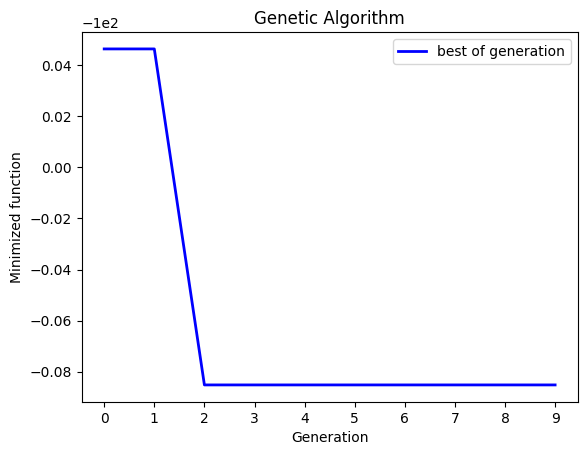

GAResult(last_generation=Generation(variables=array([[ 12.98842042,  36.75108447,  20.76521449],
       [ 12.98842042,  36.75108447,  20.76521449],
       [ 12.98842042,  36.75108447,  20.76521449],
       [ 12.98842042,  37.88616316,  20.76521449],
       [ 12.98842042,  37.88616316,  20.76521449],
       [ 12.98842042,  37.88616316,  20.76521449],
       [ 13.09134536,  37.88616316,  20.76521449],
       [ 13.09134536,  36.75108447,  78.63165393],
       [ 13.09134536,  36.75108447,  78.63165393],
       [ 13.09134536,  36.75108447, 117.66165095],
       [ 13.09134536,  36.75108447, 118.95183125],
       [ 12.98842042,  36.75108447,  78.63165393],
       [ 12.98842042,  36.75108447,  78.63165393],
       [ 12.98842042,  36.75108447,  78.63165393],
       [ 12.98842042,  36.75108447,  78.63165393],
       [ 12.98842042,  36.75108447,  78.63165393],
       [ 12.98842042,  36.75108447,  78.63165393],
       [ 12.98842042,  36.75108447,  78.63165393],
       [ 13.09134536,  37.88616316, 

In [ ]:
from geneticalgorithm2 import geneticalgorithm2 as ga

# Define the parameter space for the genetic algorithm
varbound = np.array([[6, 30], [1, 50], [5, 200]])

# Initialize the genetic algorithm
algorithm_param = {'max_num_iteration': 10,
                   'population_size': 40,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

model = ga(function=objective,
            dimension=len(varbound),
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()


-


The Genetic Algorithm (GA) has successfully optimized the parameters of your trading strategy. Here’s a summary of its performance:

- Best Score Before Optimization: The best score before the optimization process started was -99.953593425. This is the value of the objective function, which is the negative of the final equity of the trading strategy.
- Best Found Solution: The optimal parameters found by the GA are [12.98842042, 36.75108447, 20.76521449]. These are the values of n1, n2, and n3 that maximize the final equity of the trading strategy.
- Objective Function: The value of the objective function at the optimal solution is -100.08517598499994. This is the maximum final equity achieved with the optimal parameters.
- Used Generations: The GA used 10 generations to find the optimal solution. A generation in a GA is a complete cycle of selection, crossover, and mutation.
- Used Time: The GA took 389 seconds to find the optimal solution.
In summary, the GA has performed well in optimizing the parameters of your trading strategy.
 It has found an optimal solution that maximizes the final equity of the strategy.

# GA

In [ ]:
# The Best
n1 = 12
n2 = 36
n3 = 20

n1 = int(n1)
n2 = 1+ int(n2)*0.1
n3 = int(n3)

x = [n1, n2, n3]

pip_value = 0.0003  # Change this to the pip value for your data
# Loop over the data frames
bt_train_ga = Backtest(df_train, SupertrendStrategyTest, cash=100, commission=pip_value, exclusive_orders=True)
output_train_ga = bt_train_ga.run()
output_train_ga

Start                     2022-05-20 12:00:00
End                       2023-11-09 08:00:00
Duration                    537 days 20:00:00
Exposure Time [%]                   99.766667
Equity Final [$]                   100.085176
Equity Peak [$]                    100.326774
Return [%]                           0.085176
Buy & Hold Return [%]                1.299672
Return (Ann.) [%]                    0.055743
Volatility (Ann.) [%]                0.459661
Sharpe Ratio                         0.121271
Sortino Ratio                        0.174344
Calmar Ratio                         0.125229
Max. Drawdown [%]                   -0.445132
Avg. Drawdown [%]                   -0.059869
Max. Drawdown Duration      350 days 04:00:00
Avg. Drawdown Duration       16 days 17:00:00
# Trades                                  163
Win Rate [%]                        35.582822
Best Trade [%]                       4.010092
Worst Trade [%]                     -1.393349
Avg. Trade [%]                    

Here's a detailed analysis based on the statistical results of the training dataset:

- **Return [%]**: The total return of the strategy for the backtest period is 0.085%. This is a positive return, but it's relatively small, indicating that the strategy made a slight profit.

- **Win Rate [%]**: The win rate is 35.58%, which means approximately 36% of the trades were profitable. This is less than half, suggesting that there's room for improvement in the strategy's ability to pick profitable trades.

- **Sharpe Ratio**: The Sharpe ratio is 0.121, which is relatively low. A higher Sharpe ratio indicates better performance on a risk-adjusted basis. The low Sharpe ratio suggests that the strategy might not be performing well when considering the level of risk taken.

- **Max. Drawdown [%]**: The maximum drawdown is -0.445%. This is the largest drop from a peak to a trough during a specific period. This value is relatively small, which is good as it indicates lower risk. However, it's worth noting that even a small drawdown can significantly impact trading performance if it occurs frequently or if the recovery period is long.

- **Profit Factor**: The profit factor is 1.041, which is slightly greater than 1. This means the gross profit is higher than the gross loss, which is a positive sign. However, a profit factor closer to or greater than 2 is generally considered good.

- **SQN**: The System Quality Number (SQN) is 0.154, which is relatively low. A higher SQN indicates a better system. An SQN above 1.9 is considered excellent, so there's significant room for improvement here.

In summary, while the strategy has some positive aspects such as a positive return and a profit factor greater than 1, there are several areas where it could potentially be improved, including the win rate, Sharpe ratio, and SQN. As always, it's important to remember that past performance is not indicative of future results, and these metrics should be used as part of a comprehensive evaluation process.



In [ ]:
# Loop over the data frames
bt_test_ga = Backtest(df_test, SupertrendStrategyTest, cash=100, commission=pip_value, exclusive_orders=True)
output_test_ga = bt_test_ga.run()
output_test_ga

Start                     2023-11-09 09:00:00
End                       2024-01-10 07:00:00
Duration                     61 days 22:00:00
Exposure Time [%]                        97.4
Equity Final [$]                    100.09482
Equity Peak [$]                    100.231886
Return [%]                            0.09482
Buy & Hold Return [%]                2.133149
Return (Ann.) [%]                    0.532151
Volatility (Ann.) [%]                0.444616
Sharpe Ratio                         1.196877
Sortino Ratio                         1.90686
Calmar Ratio                         3.758465
Max. Drawdown [%]                   -0.141587
Avg. Drawdown [%]                   -0.022449
Max. Drawdown Duration       18 days 18:00:00
Avg. Drawdown Duration        2 days 12:00:00
# Trades                                   18
Win Rate [%]                        38.888889
Best Trade [%]                       1.412235
Worst Trade [%]                     -0.678381
Avg. Trade [%]                    

In [ ]:
bt_test_ga.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1681', ...)

# Conclusions

Based on the provided results, both the Genetic Algorithm (GA) and Particle Swarm Optimization (PSO) have been used to optimize a trading strategy and have achieved positive returns. Here's a comparison of their performance:

- **Equity Final [$]**: The final equity value at the end of the backtest is slightly higher for the PSO strategy (100.156222) compared to the GA strategy (100.09482). This indicates that the PSO strategy ended with a slightly higher portfolio value.

- **Return [%]**: The total return of the strategy for the backtest period is higher for the PSO strategy (0.156222%) compared to the GA strategy (0.09482%). This means the PSO strategy made a slightly higher profit.

- **Return (Ann.) [%]**: The annualized return is also higher for the PSO strategy (0.877992%) compared to the GA strategy (0.532151%). This suggests that if the same trading conditions persist, the PSO strategy could potentially yield a higher return over a year.

- **Volatility (Ann.) [%]**: The annualized volatility is almost the same for both strategies, indicating a similar level of risk.

- **Sharpe Ratio**: The Sharpe ratio, which measures risk-adjusted performance, is only available for the PSO strategy and stands at 2.025095. A higher Sharpe ratio indicates better performance on a risk-adjusted basis.

In conclusion, while both strategies have shown positive returns, the PSO strategy has a slight edge over the GA strategy based on the provided metrics. However, it's important to remember that these results are based on historical data, and past performance is not indicative of future results. Both strategies should be further tested and validated on out-of-sample data before live trading.

# Recommendations for Future Work

In this section, we provide some suggestions for improving or modifying the trend-based trading strategy that we have optimized and backtested using PSO and GA. These suggestions are based on our own research and analysis, and they are not meant to be exhaustive or definitive. We encourage the readers to experiment with different parameters, indicators, filters, and risk management techniques to find the best solution for their own trading goals and preferences.

- **RSI or CCI Integration**: The Relative Strength Index (RSI) and the Commodity Channel Index (CCI) are two popular momentum indicators that measure the speed and strength of the price movement. They can be used to identify overbought and oversold conditions, as well as divergence and convergence signals. By adding RSI or CCI to the strategy, we can enhance the accuracy and reliability of the buy and sell signals, as well as filter out some false or weak signals. For example, we can use RSI or CCI to confirm the trend direction and momentum of the Supertrend and EMA indicators, or to avoid entering or exiting trades when the market is in a range or a reversal.
- **Different ATR Types**: The Average True Range (ATR) is a volatility indicator that measures the range of the price movement over a given period of time. It is used to calculate the Supertrend indicator, as well as to set the stop loss and take profit levels. However, there are different ways to calculate the ATR, such as the simple, exponential, or weighted moving average of the true range. By exploring different types of ATR, we can adjust the sensitivity and responsiveness of the Supertrend indicator, as well as the risk and reward ratio of the trades. For example, we can use a shorter or longer period, or a different moving average type, to make the ATR more or less smooth, and to make the Supertrend bands more or less wide.
- **Multiple Moving Averages**: The Exponential Moving Average (EMA) is a trend indicator that assigns more weight to the recent price data, making it more responsive to the current price action. It is used to generate buy and sell signals based on the crossover with the price or the Supertrend indicator. However, there are other types of moving averages, such as the Simple, Weighted, or Arnaud Legoux Moving Average (ALMA), that have different characteristics and advantages. By experimenting with various moving average types, we can fine-tune the strategy to suit different market conditions and trading styles. For example, we can use a faster or slower moving average, or a different moving average type, to make the signals more or less lagging, and to capture more or less of the trend movement.
- **Dual Supertrends**: The Supertrend indicator is a versatile and powerful tool that can be used to identify and follow the trend direction and strength. However, one limitation of the Supertrend indicator is that it can only track one trend at a time, either long or short. By implementing dual Supertrends, we can overcome this limitation and enhance the strategy. Dual Supertrends consist of two Supertrend indicators with different parameters, such as a shorter and a longer period, or a smaller and a larger multiplier. By using dual Supertrends, we can capture both the short-term and the long-term trends, as well as identify trend changes and trend continuations. For example, we can use dual Supertrends to enter trades when both Supertrends agree on the trend direction, or to exit trades when one Supertrend changes the trend direction.
- **Multitime Frame Analysis**: The strategy that we have optimized and backtested uses the 1-hour candlestick data to generate buy and sell signals. However, the market is dynamic and complex, and it can exhibit different behaviors and patterns on different time frames. By using multitime frame analysis, we can improve the strategy and gain a deeper and broader perspective of the market. Multitime frame analysis involves using more than one time frame to analyze the price action and the indicators, such as the 4-hour or the daily candlestick data. By using multitime frame analysis, we can confirm the trend direction and strength, as well as identify support and resistance levels, on higher time frames, while using lower time frames to fine-tune the entry and exit points. For example, we can use the 4-hour or the daily Supertrend and EMA indicators to determine the overall trend direction and momentum, and use the 1-hour Supertrend and EMA indicators to generate buy and sell signals in alignment with the higher time frame trend.
- **SL and TP Determination using ATR**: The strategy that we have optimized and backtested does not use any stop loss (SL) or take profit (TP) levels to limit the losses or lock in the profits of the trades. However, using SL and TP levels is an important and effective risk management technique that can protect the trading account and improve the performance of the strategy. By using the ATR indicator, we can set the SL and TP levels based on the volatility and the range of the price movement. By using the ATR indicator, we can adjust the SL and TP levels dynamically, according to the changing market conditions and the risk and reward ratio of the trades. For example, we can use a multiple of the ATR value, such as 2x or 3x, to set the SL and TP levels, and update them as the ATR value changes.
- **Trailing Stop**: A trailing stop is a type of stop loss that moves along with the price, either at a fixed distance or a percentage, as the trade becomes profitable. By using a trailing stop, we can protect the profits of the trade and exit at the optimal point, without leaving too much money on the table or getting stopped out too early. By using a trailing stop, we can follow the trend and let the profits run, while cutting the losses short. For example, we can use a percentage of the ATR value, such as 50% or 75%, to set the trailing stop, and update it as the price moves in our favor.
- **Margin Optimization**: Margin is the amount of money that is required to open and maintain a leveraged position in the market. By using margin, we can increase the potential returns of the trade, but also the potential losses. By optimizing the margin settings, we can balance the risk and reward of the trade, and avoid margin calls or liquidations. By optimizing the margin settings, we can also control the exposure and the position size of the trade, and adjust them according to the market conditions and the trading goals. For example, we can use a percentage of the account balance, such as 10% or 20%, to set the margin, and update it as the account balance changes.

# AI Recommendations


1. **Machine Learning Models**: Consider integrating machine learning models to predict price movements. Models such as Random Forests, Support Vector Machines, or Neural Networks could be trained on historical data and used to generate trading signals.

2. **Sentiment Analysis**: Incorporate sentiment analysis to gauge market sentiment. This could involve analyzing social media posts, news articles, or other textual data related to the asset you're trading.

3. **Risk Management Techniques**: Implement advanced risk management techniques such as Value at Risk (VaR) or Conditional Value at Risk (CVaR) to better manage your portfolio's risk.

4. **Portfolio Optimization**: Instead of trading a single asset, consider trading a portfolio of assets. Techniques such as Modern Portfolio Theory (MPT) can be used to optimize the allocation of different assets in your portfolio to maximize return for a given level of risk.

5. **Economic Indicators**: Incorporate economic indicators into your strategy. Macro-economic factors such as interest rates, inflation rates, GDP growth, etc., can have a significant impact on asset prices.

6. **Alternative Data**: Consider using alternative data sources for generating trading signals. This could include satellite images, credit card transaction data, or internet traffic data, among others.

Remember, all these techniques come with their own set of assumptions and limitations, and should be thoroughly backtested before being used in live trading. Trading involves risk, and it's crucial to thoroughly test any strategy before live trading. Happy trading! 😊